<a href="https://colab.research.google.com/github/Ervinsmith/Codsoft/blob/main/TitanicSurvivalPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Task 1: Titanic Survival Prediction**

In [8]:
import pandas as pd

# Load the dataset
file_path = '/content/Titanic-Dataset.csv'
data = pd.read_csv(file_path)

# Display column names to inspect for hidden characters
print("Original Columns:", data.columns)

# Strip any leading or trailing whitespace from column names
data.columns = data.columns.str.strip()

# Display the cleaned column names
print("Cleaned Columns:", data.columns)


Original Columns: Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
Cleaned Columns: Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [9]:
print(data.columns)


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [11]:
# Handle missing values
data['Age'].fillna(data['Age'].median(), inplace=True)
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)
data['Fare'].fillna(data['Fare'].median(), inplace=True)

# Drop the 'Cabin' column since it has too many missing values
data.drop('Cabin', axis=1, inplace=True)

# Encode categorical variables
data = pd.get_dummies(data, columns=['Sex', 'Embarked'], drop_first=True)

# Drop unnecessary columns
data.drop(['Name', 'Ticket', 'PassengerId'], axis=1, inplace=True)


In [12]:
from sklearn.model_selection import train_test_split

# Define features (X) and target variable (y)
X = data.drop('Survived', axis=1)
y = data['Survived']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [13]:
from sklearn.linear_model import LogisticRegression

# Initialize the model
model = LogisticRegression(max_iter=1000)

# Train the model
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [14]:
from sklearn.metrics import accuracy_score

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')


Accuracy: 0.81


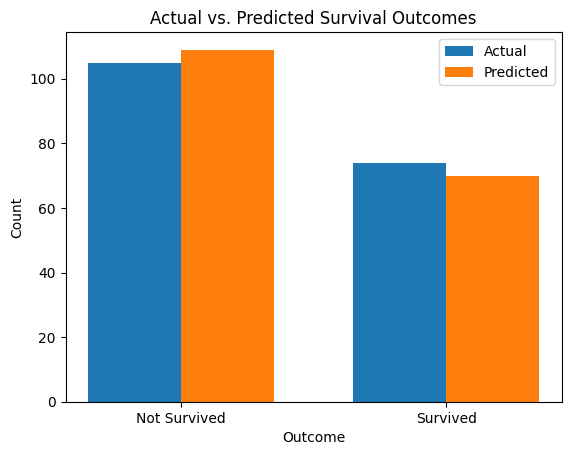

In [16]:
import matplotlib.pyplot as plt

# Define the labels for survived and not survived
labels = ['Not Survived', 'Survived']

# Count the actual and predicted survival outcomes
actual_counts = [len(y_test) - sum(y_test), sum(y_test)]
predicted_counts = [len(y_test) - sum(y_pred), sum(y_pred)]

# Create a bar plot
x = range(len(labels))  # Generate a range of indices for the bars
width = 0.35  # Width of the bars
fig, ax = plt.subplots()
rects1 = ax.bar(x, actual_counts, width, label='Actual')  # Bars for actual counts
rects2 = ax.bar([i + width for i in x], predicted_counts, width, label='Predicted')  # Bars for predicted counts

# Add labels, title, and legend
ax.set_xlabel('Outcome')
ax.set_ylabel('Count')
ax.set_title('Actual vs. Predicted Survival Outcomes')
ax.set_xticks([i + width/2 for i in x])  # Set x-ticks to the center of each group of bars
ax.set_xticklabels(labels)
ax.legend()

# Show the plot
plt.show()
